# Regression

## 1. Load Data and Train Model

In [2]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error
from holisticai.explainability.metrics import surrogate as surrogate_metrics

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])
y_pred = model.predict(train['X'])
mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.013731416251044857)

## 2. Surrogate-Based Metrics

In [3]:
from holisticai.utils import RegressionSurrogate

surrogate = RegressionSurrogate(train["X"], y_pred, model_type='tree')

y_surrogate = surrogate.predict(train['X'])

In [4]:
from holisticai.explainability.metrics import surrogate_mean_squared_error_difference
# measure the difference between the surrogate and the original model

surrogate_mean_squared_error_difference(train['y'], y_pred, y_surrogate)

np.float64(-0.004623170048938653)

In [5]:
from holisticai.explainability.metrics import surrogate_mean_squared_error
# measure the mean squared error of the surrogate model

surrogate_mean_squared_error(y_pred, y_surrogate)

np.float64(0.0033627827776968175)

In [6]:
from holisticai.explainability.metrics import surrogate_features_stability
# measure the stability of the features. Higher values indicate that the features are stable

surrogate_features_stability(train['X'], y_pred, surrogate)

0.8404114615543186

In [7]:
from holisticai.explainability.metrics import surrogate_feature_importances_stability
# measure the stability of the feature importances. Higher values indicate that the feature importances are stable

surrogate_feature_importances_stability(train['X'], y_pred, surrogate)

0.9800543235593523

In [8]:
from holisticai.explainability.metrics import spread_divergence
# measure the spread of the feature importances. Lower values indicate that the feature importances are more concentrated

spread_divergence(surrogate.feature_importances_)

0.1766958408909941

## 3. Tree-Based Metrics

In [9]:
from holisticai.explainability.metrics.tree import tree_number_of_features
# measure the number of features used in the surrogate model. Lower values indicate that the surrogate model is more interpretable

tree_number_of_features(surrogate)

90

In [10]:
from holisticai.explainability.metrics.tree import tree_number_of_rules
# measure the number of rules used in the surrogate model. Lower values indicate that the surrogate model is more interpretable

tree_number_of_rules(surrogate)

258

In [11]:
from holisticai.explainability.metrics.tree import tree_depth_variance
# measure the variance of the depth of the surrogate model. Lower values indicate that the surrogate model is more interpretable

tree_depth_variance(surrogate)

np.float64(6.886380025238869)

In [12]:
from holisticai.explainability.metrics.tree import weighted_average_depth
# measure the weighted average depth of the surrogate model. Lower values indicate that the surrogate model is more interpretable

weighted_average_depth(surrogate)

np.float64(9.965116279069768)

In [13]:
from holisticai.explainability.metrics.tree import weighted_average_explainability_score
# measure the weighted average explainability score of the surrogate model. Lower values indicate that the surrogate model is more interpretable

weighted_average_explainability_score(surrogate)

np.float64(9.523255813953488)

## 4. Computing Group Metrics

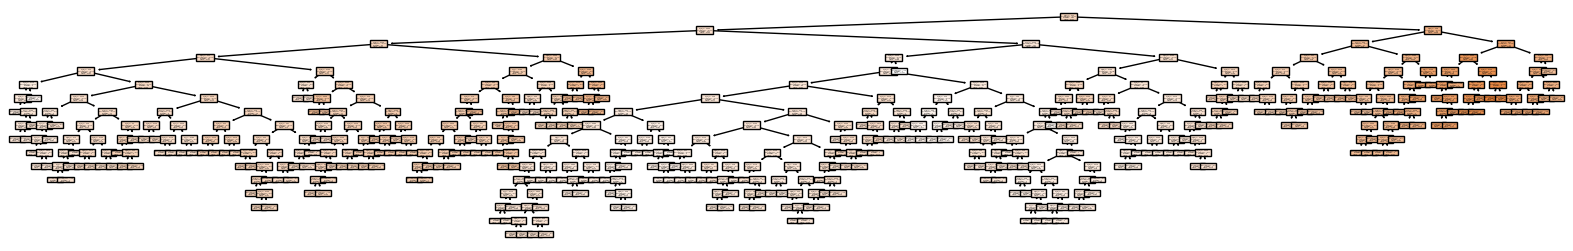

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# plot the surrogate model
plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, filled=True)

In [16]:
metrics, surrogate = surrogate_metrics.regression_surrogate_explainability_metrics(train['X'], train['y'], y_pred, surrogate_type='tree', metric_type="all", return_surrogate_model=True)
metrics

,Value,Reference
MSE Difference,-0.004623,0.0
Surrogate MSE,0.003363,0.0
Features Stability,0.840411,1.0
Feature Importances Stability,0.980054,1.0
Spread Divergence,0.176696,0.0
Number of Features,90.000000,1.0
Number of Rules,258.000000,1.0
Tree Depth Variance,6.886380,0.0
Weighted Average Explainability Score,9.523256,0.0
Weighted Average Depth,9.965116,0.0


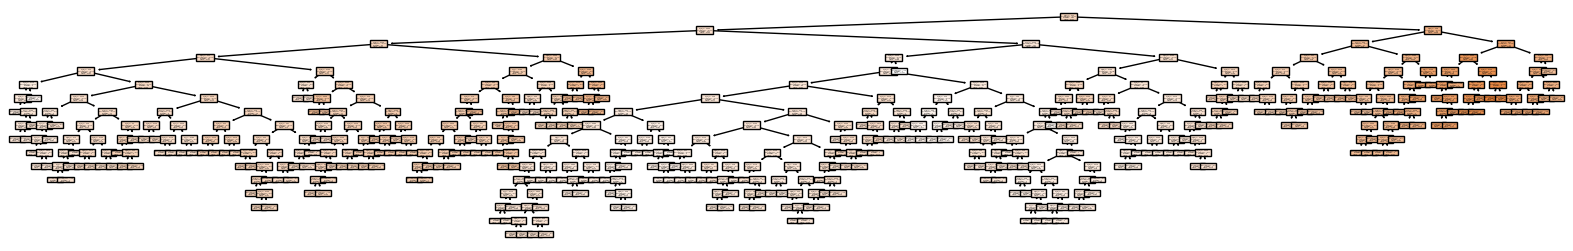

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
_ = plot_tree(surrogate._surrogate, filled=True)